In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm

In [3]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 1. * 2. * f_diss * F0 * mp/X
r0 = 250. * pc
v0 = 170. * kmps
t0 = r0/v0
Sigma0        = 52.*Msun_pcsq
Sigma_diss = 1.5 * Msun /pc/pc/Myr
chi0 = 1.0
xi = chi0 * Sigma_diss *t0/Sigma0
xi

0.040643180349062696

In [4]:
Mach  = np.logspace(0.1, 4., 100)
Gamma = np.logspace(-3, 3., 100)

a = 40

dMassFluxHI = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
    
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit

        
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, M, 0))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  M, 0))[0] 

        
        
        j+=1
        
            
    i+=1



In [5]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_flux = 1. - dMassFlux

np.amax(FH2_flux),np.amin(FH2_flux)

(0.998822799024745, 0.0)

In [6]:
Mach  = np.logspace(0.1, 4., 100)
Gamma = np.logspace(-3, 3., 100)
a = 40

dMassHI = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMasstot = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        

        dMassHI[i,j] = integrate.quad(dMass_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, M, 0))[0]

        dMasstot[i,j] = integrate.quad(dMass_tot, xlow, xhigh,  \
                                            args=(a, gamma, M, 0))[0] 
        
        
        j+=1
            
    i+=1



In [7]:
dMass = dMassHI/dMasstot
FH2_mass = 1. - dMass

np.amax(FH2_mass),np.amin(FH2_mass)

(0.9996628769018899, 0.0)

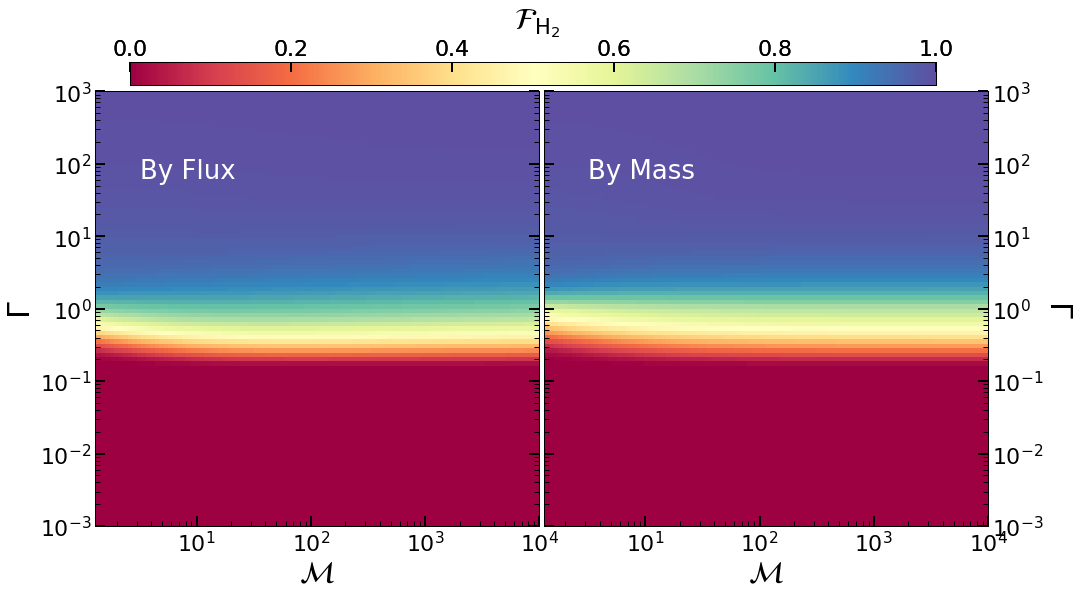

In [8]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(16,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax[0].pcolormesh(Mach, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[0].set_xlim(1.3, 1.e4)
ax[0].set_ylim(1.e-3,1.e3)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\mathcal{M}$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



plot = ax[1].pcolormesh(Mach, Gamma, np.transpose(FH2_mass),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
ax[1].set_xlim(1.3, 1.e4)
ax[1].set_ylim(1.e-3,1.e3)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\mathcal{M}$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)

file_name = os.path.join(fig_path, 'gamma_Mach.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


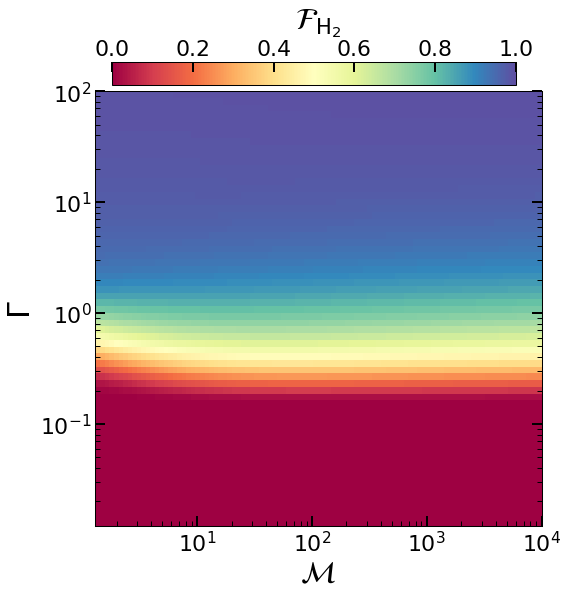

In [9]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(Mach, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax.set_xlim(1.3, 1.e4)
ax.set_ylim(1.2e-2, 1.e2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\mathcal{M}$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)


file_name = os.path.join(fig_path, 'gamma_Mach.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


# Fixed Solid Angle

In [1]:
Mach  = np.logspace(0.1, 4., 100)
Gamma = np.logspace(-2, 2., 100)
rmax = 10. * kpc

a = rmax/r0

dMassFluxHI_SA = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot_SA = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        xhigh = xcrit
        
        dMassFluxHI_SA[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 2))[0]
        
        dMassFluxtot_SA[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 2))[0] 
        
        
        j+=1
        
            
    i+=1



NameError: name 'np' is not defined

In [12]:
dMassFlux = dMassFluxHI_SA/dMassFluxtot_SA
FH2_fluxSA = 1. - dMassFlux

np.amax(FH2_fluxSA),np.amin(FH2_fluxSA)

(0.9995308834223519, 0.055344236931391455)

In [15]:
Mach  = np.logspace(0.1, 4., 100)
Gamma = np.logspace(-2, 2., 100)
rmax = 10. * kpc

a = rmax/r0

dMassFluxHI_Int = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot_Int = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        
        dMassFluxHI_Int[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 1))[0]
        
        dMassFluxtot_Int[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 1))[0] 
        
        
        j+=1
            
    i+=1



In [16]:
dMassFlux = dMassFluxHI_Int/dMassFluxtot_Int
FH2_fluxInt = 1. - dMassFlux

np.amax(FH2_fluxInt),np.amin(FH2_fluxInt)

(0.999956551191927, 0.8789484464965887)

In [17]:
128*8

1024